<a href="https://colab.research.google.com/github/Munazir/Deep-Learning-with-TensorFlow/blob/master/Intro2ALML(Digit_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Written MNIST Digit Recognition

In [3]:
## Import the necessary libraries
import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1.13.1


In [0]:
## Loading the MNIST dataset

dr_mnist = tf.keras.datasets.mnist

In [5]:
dr_mnist

<module 'tensorflow._api.v1.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/keras/datasets/mnist/__init__.py'>

In [0]:
(train_feature, train_label),(test_feature,test_label) = dr_mnist.load_data()

In [9]:
print(train_feature[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

5


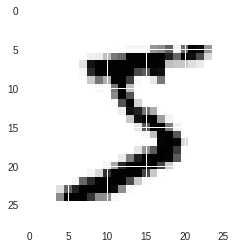

In [10]:
## Visualize the digit
plt.imshow(train_feature[0])
print(train_label[0])

In [0]:
## Normalize the data so that all the values in comes in between 0 to 1
train_feature = train_feature/255.0
test_feature = test_feature/255.0

In [12]:
## check value of one image after Normalization
print(train_feature[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
## Create model to classify the digits into 10 classes from 0 to 0

dr_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
## Compile the model 

dr_model.compile(optimizer="adam",
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [21]:
## fit the model on the data
dr_model.fit(train_feature,train_label,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2553 - acc: 0.9271
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1124 - acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0785 - acc: 0.9763
Epoch 4/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0585 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0447 - acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0360 - acc: 0.9884
Epoch 7/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0290 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0227 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0189 - acc: 0.9943
Epoch 10/10
60000/60000 [==============================] - 8s 141us/samp

In [23]:
## Evaluate the model against the test data
dr_model.evaluate(test_feature,test_label)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.0843 - acc: 0.9774


[0.0843445341440056, 0.9774]

In [0]:
## get the predictions 
predictions_dr = dr_model.predict(test_feature)

In [26]:
## Check for the prediction for the first observation
print(test_label[0])
print(predictions_dr[0])
# can see 7th one in the probablity list has maximum value

7
[2.5819287e-09 4.1785238e-11 1.5498287e-07 5.9497056e-06 1.3037505e-15
 1.8510214e-11 4.4488573e-14 9.9999380e-01 2.5559304e-09 1.0835223e-07]


In [0]:
## suppose we want to train only for 99% accuracy once we reached there wanted to stop the training by applying call back
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\n Reached 99 % accuracy so training was cancelled !!")
      self.model.stop_training = True

callbacks2 = myCallBack()


In [32]:
## fit the model on the data
dr_model.fit(train_feature,train_label,epochs=10,callbacks=[callbacks2])

Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0094 - acc: 0.9972
Epoch 2/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0086 - acc: 0.9974
Epoch 3/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0085 - acc: 0.9975
Epoch 4/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0073 - acc: 0.9980
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0083 - acc: 0.9973
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0066 - acc: 0.9979
Epoch 7/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0053 - acc: 0.9983
Epoch 8/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0059 - acc: 0.9982
Epoch 9/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0043 - acc: 0.9988
Epoch 10/10
60000/60000 [==============================] - 8s 133us/sampl